<a href="https://colab.research.google.com/github/Educat8n/Invited_Talks/blob/master/UO/Artificial-Intelligence-Cloud-and-Edge-Implementations/Refactore_Codes_Easy_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

Write the code in a python file using magic command `%%writefile`

In [ ]:
%%writefile cancer_detection.py


# Step -1 - Import Packag
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10, 10)



# Step - 2 - Define the main function
def main():
    # Get data
    cancer_data = load_breast_cancer()
    cancer_data_X = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
    cancer_data_y = cancer_data.target
    features = cancer_data.feature_names
    
    vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']
    ## Data Exploration
    print(f'The features in dataset are: {features}')
    #print(f'Data description\n {cancer_data_X.describe()}')
    
    #Plots
    plot_data(cancer_data_X, cancer_data_y, features= vars, cor=True)

    ## Remove Outliers
    cancer_data_X, cancer_data_y = remove_outliers(cancer_data_X,cancer_data_y, features)
    
    X_train, y_train, X_test, y_test = preprocess(cancer_data_X, cancer_data_y, features)
    model = SVC(random_state=6)

    model = train(model, X_train, y_train)
    
    baseline = evaluate(model, X_test, y_test, bl=True)

    best_params = optimize_models(X_train, y_train)
    print(best_params)

    ## Build Best Model
    best_C= best_params['C']
    best_kernel = best_params['kernel']

    best_model = SVC(kernel = best_kernel, C= best_C, random_state=6)
    best_model = train(best_model, X_train, y_train)
    evaluate (best_model, X_test, y_test)
    

 
    
    
# Step - 3 - Plot graphs to understand data
def plot_data(x_df, y_df,features, cor=False):
    X = x_df.copy(deep=True)
    X['class'] = y_df
    sns.pairplot(X, hue = 'class', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )
    plt.show()
    
    if cor:
      corr = X[features].corr()
      plt.figure(figsize=(10,10))
      sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
      plt.show()






# Step - 4 - Preprocess data
# Step -4a : Remove outliers
def remove_outliers(x,y, features):
    #remove null
    x_df = x.copy(deep=True)
    x_df['class'] = y
    x_df.dropna(inplace=True)
    return x_df[features], x_df['class']
    
    
# Step -4b : Normalize data
def scale_numeric(df):
    x = df.values 
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

    

# Step -4b : Preprocess data
def preprocess(x, y, features):
    x_df = x[features].copy(deep=True)
    x_df = scale_numeric(x_df)
    #print(len(x_df),len(y))
    # Split data into train, test
    X_train, X_test, y_train, y_test = train_test_split(x_df,y, test_size=0.3, random_state=45)
    return X_train, y_train, X_test, y_test
    
    
    
    
# Step - 5 - train model 
def train(model,X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
    
# Step - 6 - Evaluate Model
def evaluate(model, X_test, y_test, plot = True, print_results=True, bl=False):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    if print_results:
      if bl:
        print('\n\nBaseline Model Performance on Test Dataset:\n')
      else:
        print('\n\nBest Model Performance on Test Dataset:\n')
      print('\nConfusion Matrix:\n',cm)
      print(f'Accuracy: {acc*100}%')

    if plot:
      sns.heatmap(cm, annot= True)
      plt.show()
    return 
    
    
    
    
# Step - 7 - Improve Model
def optimize_models(X_train, y_train):
  params = {'kernel':['rbf'], 'C':[1.0, 5.0, 10]}
  model = SVC(random_state=5)
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  return clf.best_params_


# call the main finction
if __name__ == '__main__':
    main()
    
    
    

Overwriting cancer_detection.py


# Step 2 

Run the python command using magic command `%run` followed by the python file name 

The features in dataset are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


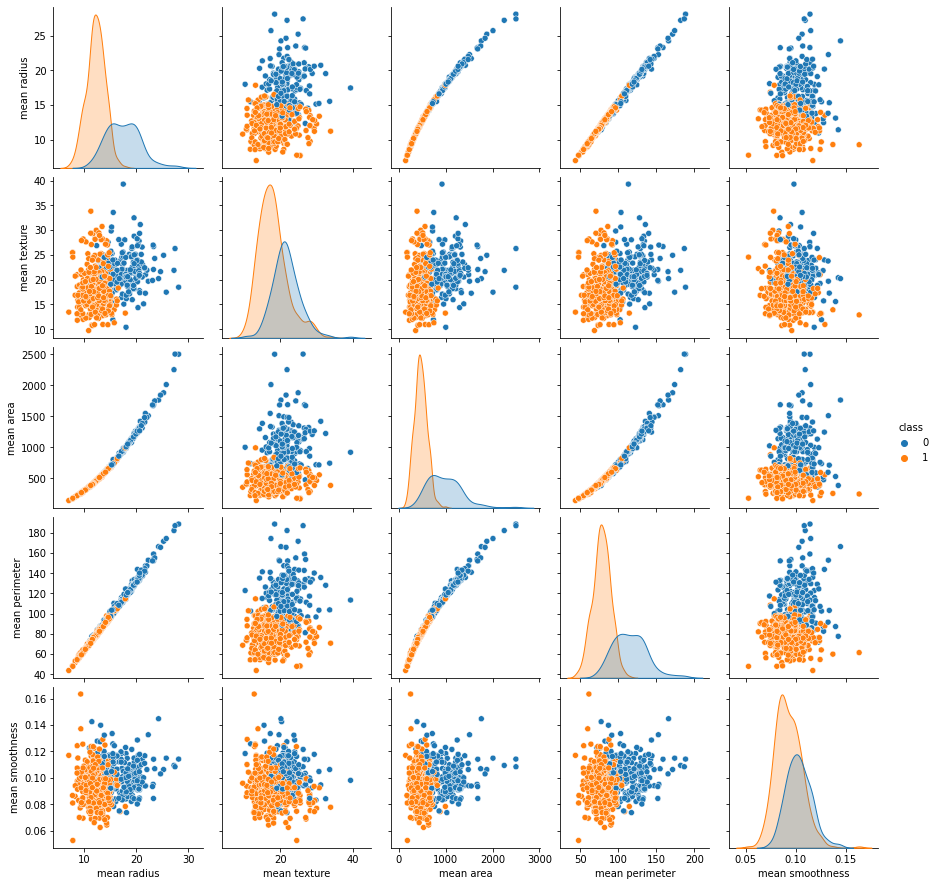

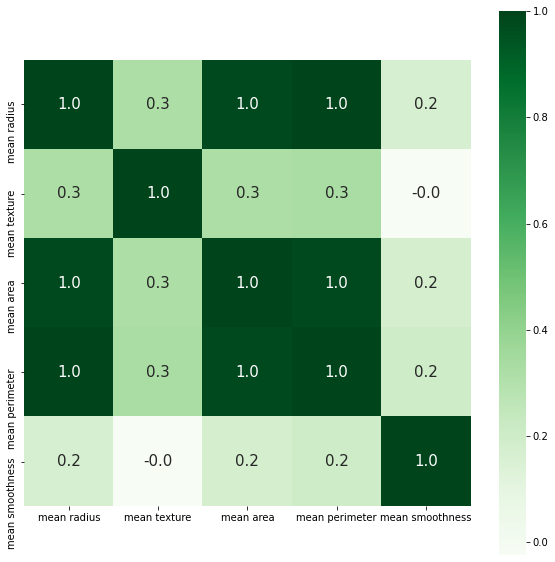



Baseline Model Performance on Test Dataset:


Confusion Matrix:
 [[ 57   4]
 [  1 109]]
Accuracy: 97.07602339181285%


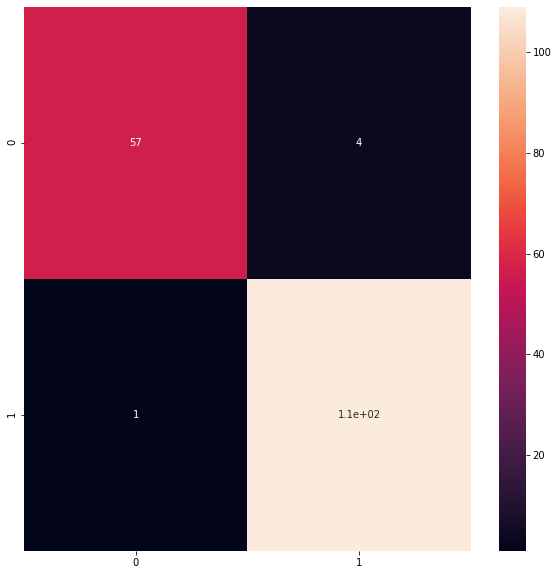

{'C': 5.0, 'kernel': 'rbf'}


Best Model Performance on Test Dataset:


Confusion Matrix:
 [[ 59   2]
 [  0 110]]
Accuracy: 98.83040935672514%


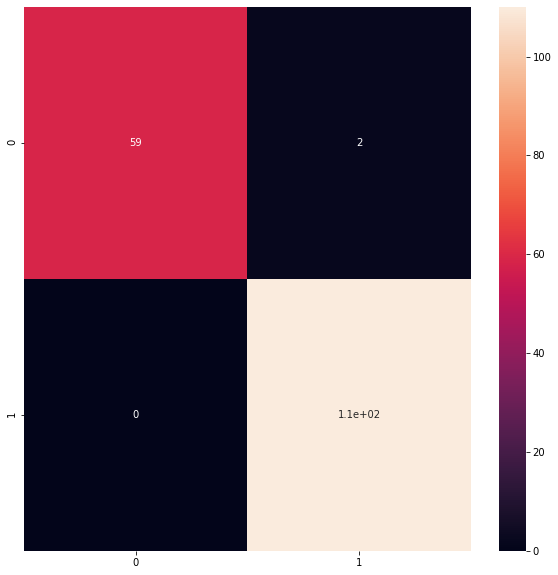

In [ ]:
%run cancer_detection.py